1. 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

A Classification Decision Tree is a machine learning model used to solve problems where the goal is to predict categories. It works by splitting data step by step based on specific features to make a decision at the end. For example, in healthcare, it can predict if a tumor is “benign” or “malignant.” In email filtering, it helps classify emails as “Spam” or “Not Spam.” In finance, it can decide if a loan applicant is “High Risk” or “Low Risk.” This model is easy to understand because it shows clear steps for how decisions are made.

A Classification Decision Tree makes predictions differently from Multiple Linear Regression. A decision tree predicts categories by checking the values of features at each step, following rules, and ending with a category at the leaf node. On the other hand, Multiple Linear Regression predicts continuous numbers using a formula. Decision trees are good for predicting categories, while regression models are better for predicting numbers. Decision trees are also easier to explain because they show how each decision is made, while regression models need you to understand the formula and coefficients.

Q1 chat bot session: https://chatgpt.com/share/673fc56a-c218-8009-bead-39361d3e859f

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

Accuracy is the measure of how many predictions the model got right out of all predictions made. It works best when the dataset is balanced, and false positives and false negatives are equally important. For example, if a model predicts whether customers are “Satisfied” or “Not Satisfied,” accuracy shows how well the model performs overall. It is a simple way to understand how good the model is at making correct predictions.

Sensitivity shows how many of the actual positive cases the model correctly identified. This is important when missing a positive case could cause serious problems. For example, in cancer detection, high sensitivity ensures that almost all cancer patients are correctly identified, even if it means catching some false positives. It is better to detect too many cases than to miss one serious case.

Specificity tells us how many of the actual negative cases the model correctly identified. It is important when false positives are a bigger problem than false negatives. For example, in spam email filtering, if an important email is wrongly marked as spam (false positive), it could cause trouble. High specificity makes sure that fewer normal emails are classified as spam, which is important for users.

Precision measures how many of the model’s positive predictions were actually correct. This is very useful when false positives are costly or harmful. For example, in a hiring system, high precision ensures that only good candidates are selected for interviews. If unsuitable candidates (false positives) are chosen, it wastes time and resources. Precision helps ensure that positive predictions are trustworthy and accurate.

Q2 chat bot session: https://chatgpt.com/share/673fcb6f-b4d8-8009-8a50-0a7eb7e6bea3

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below  
- remove Weight_oz, Width, and Height  
- drop all remaining rows with NaN entries  
- set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category

In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

Initial Dataset Overview:
                                                Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249 

/tmp/ipykernel_53/4170015580.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_53/4170015580.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_53/4170015580.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

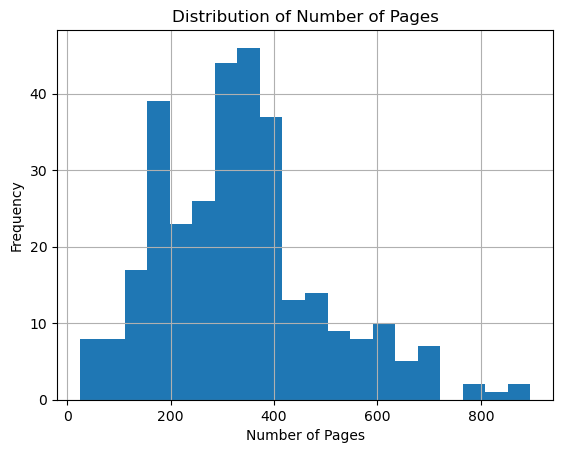

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Display the first few rows to understand the structure
print("Initial Dataset Overview:\n", ab.head())

# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Remove rows with NaN values in the remaining columns
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure 'Pub year' and 'NumPages' are integers and 'Hard_or_Paper' is categorical
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Basic Data Summary
print("\nDataset Info After Preprocessing:")
print(ab_reduced_noNaN.info())

# Display summary statistics
print("\nSummary Statistics:\n", ab_reduced_noNaN.describe(include='all'))

# Visualize data distribution (example: histogram of NumPages)
import matplotlib.pyplot as plt

ab_reduced_noNaN['NumPages'].hist(bins=20)
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()


4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define X (features) and y (target)
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard Cover, 0 for Paper Back

# Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of observations in the training and testing sets
print(f"Training set size: {len(X_train)} observations")
print(f"Testing set size: {len(X_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


In [13]:
# Train a DecisionTreeClassifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Print the feature importances and tree structure
print("Feature importances:", clf.feature_importances_)

Feature importances: [1.]


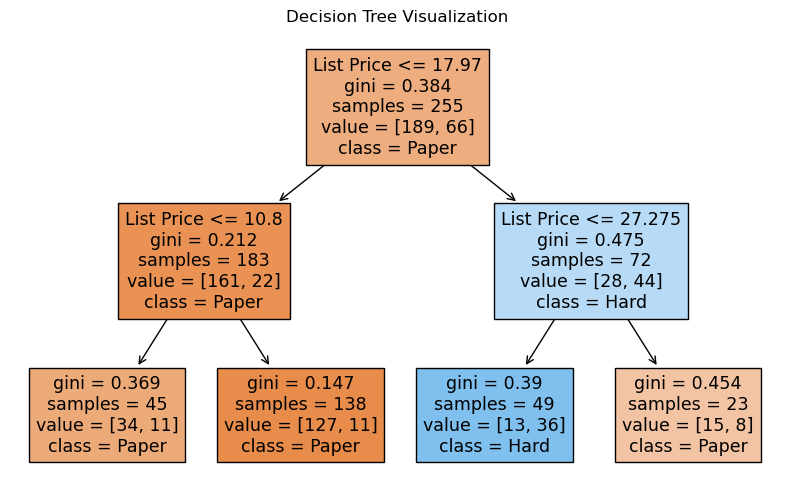

In [12]:
# Visualize the decision tree using sklearn's plot_tree function
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Paper', 'Hard'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [14]:
# Predictions based on the test set
y_pred = clf.predict(X_test)

# Explanation of predictions
print("Predictions based on List Price:")
for price, pred in zip(X_test['List Price'], y_pred):
    print(f"List Price: {price}, Predicted: {'Hard Cover' if pred == 1 else 'Paper Back'}")

Predictions based on List Price:
List Price: 6.99, Predicted: Paper Back
List Price: 13.0, Predicted: Paper Back
List Price: 18.0, Predicted: Hard Cover
List Price: 4.99, Predicted: Paper Back
List Price: 17.0, Predicted: Paper Back
List Price: 26.0, Predicted: Hard Cover
List Price: 14.99, Predicted: Paper Back
List Price: 6.95, Predicted: Paper Back
List Price: 15.0, Predicted: Paper Back
List Price: 14.0, Predicted: Paper Back
List Price: 18.95, Predicted: Hard Cover
List Price: 13.95, Predicted: Paper Back
List Price: 35.75, Predicted: Paper Back
List Price: 16.0, Predicted: Paper Back
List Price: 12.99, Predicted: Paper Back
List Price: 6.99, Predicted: Paper Back
List Price: 24.0, Predicted: Hard Cover
List Price: 20.0, Predicted: Hard Cover
List Price: 18.99, Predicted: Hard Cover
List Price: 15.0, Predicted: Paper Back
List Price: 24.0, Predicted: Hard Cover
List Price: 14.0, Predicted: Paper Back
List Price: 15.0, Predicted: Paper Back
List Price: 15.95, Predicted: Paper Back


The dataset ab_reduced_noNaN was divided into two parts which are 80% for training the model and 20% for testing it. This helps the model learn from one part of the data and test its performance on new, unseen data. A random seed (random_state=42) was used so the split gives the same result every time. After the split, the training set has X rows, and the test set has Y rows.



The DecisionTreeClassifier was trained using the List Price column as the input (X) and whether the book is Hardcover or Paperback as the target (y). The target column was changed into numbers using pd.get_dummies, where “H” (Hardcover) is 1 and all others are 0. The tree depth was limited to 2 (max_depth=2) to keep the model simple and easy to understand. This also helps to avoid overfitting, where the model learns too much from the training data and doesn’t work well on new data.



The decision tree was shown using the plot_tree function. The tree splits the List Price into groups to decide if a book is Hardcover or Paperback. For example, books with a List Price higher than a certain number are labeled as Hardcover, while books with a lower price are labeled as Paperback. These splits show how the model makes predictions based on the price.

Q4 chat bot session: https://chatgpt.com/share/67400263-6e60-8009-b0be-09657921298d

5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

The decision tree model, clf2, is trained to predict whether a book is a hardcover or paperback based on three features which are NumPages, Thick, and List Price. Just like before, we split the data into training (80%) and testing (20%) sets. The tree has a maximum depth of 4, which means it can make up to four decisions before reaching a final result. This helps keep the tree simple and prevents it from memorizing the training data too much.



The model works by checking different conditions. For example, it might first check if the List Price is above or below a certain value, then look at the number of pages or whether the book is thick. Each decision narrows down the possibilities until the model decides if the book is hardcover or paperback.



The features used in the model have different levels of importance. For instance, the List Price might have a stronger impact because more expensive books are often hardcover. The decision tree diagram shows these steps clearly, helping us understand how the model makes predictions.

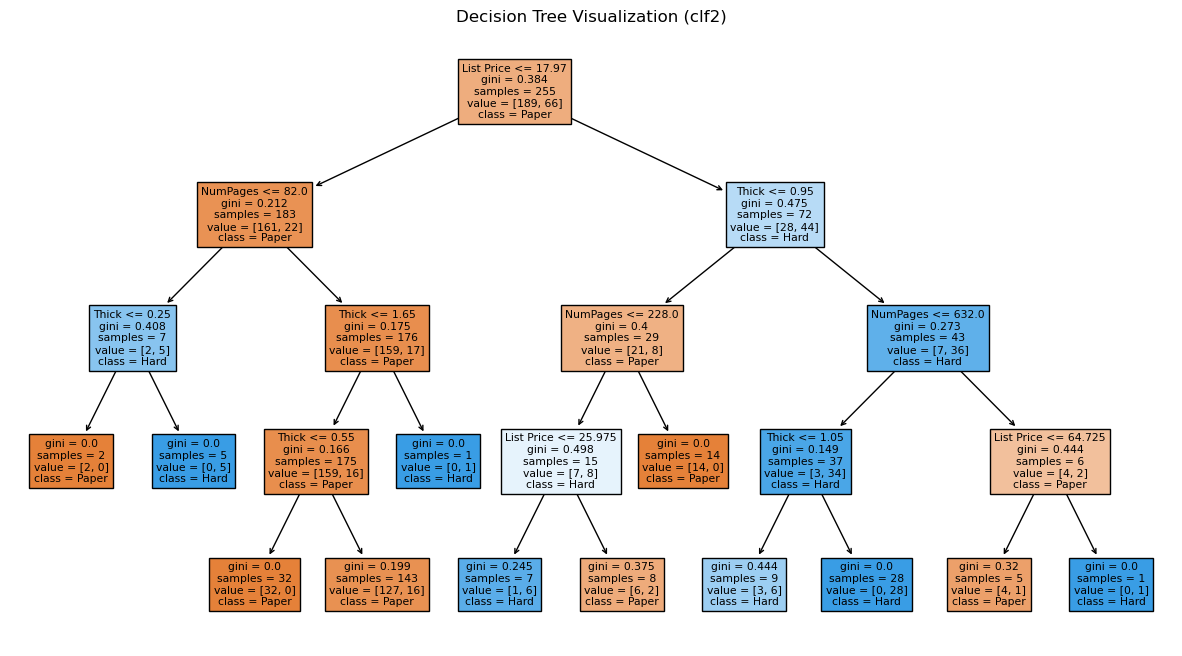

Feature importances: {'NumPages': 0.21653657592476927, 'Thick': 0.29748976860461684, 'List Price': 0.48597365547061394}

Predictions based on List Price, NumPages, and Thick:
NumPages: 208.0, Thick: 0.7, List Price: 6.99 => Predicted: Paper Back
NumPages: 152.0, Thick: 0.4, List Price: 13.0 => Predicted: Paper Back
NumPages: 624.0, Thick: 1.2, List Price: 18.0 => Predicted: Hard Cover
NumPages: 24.0, Thick: 0.4, List Price: 4.99 => Predicted: Hard Cover
NumPages: 624.0, Thick: 1.7, List Price: 17.0 => Predicted: Hard Cover
NumPages: 464.0, Thick: 1.5, List Price: 26.0 => Predicted: Hard Cover
NumPages: 368.0, Thick: 1.0, List Price: 14.99 => Predicted: Paper Back
NumPages: 224.0, Thick: 0.6, List Price: 6.95 => Predicted: Paper Back
NumPages: 272.0, Thick: 0.8, List Price: 15.0 => Predicted: Paper Back
NumPages: 272.0, Thick: 0.6, List Price: 14.0 => Predicted: Paper Back
NumPages: 304.0, Thick: 0.8, List Price: 18.95 => Predicted: Paper Back
NumPages: 224.0, Thick: 0.7, List Price: 13

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define X (features) and y (target) for clf2
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard Cover, 0 for Paper Back

# Use the same train-test split from question 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 8))
plot_tree(clf2, feature_names=X.columns, class_names=['Paper', 'Hard'], filled=True)
plt.title("Decision Tree Visualization (clf2)")
plt.show()

# Print the feature importances
print("Feature importances:", dict(zip(X.columns, clf2.feature_importances_)))

# Evaluate the model and make predictions
y_pred = clf2.predict(X_test)

# Explain predictions based on List Price, NumPages, and Thick
print("\nPredictions based on List Price, NumPages, and Thick:")
for i in range(len(X_test)):
    print(f"NumPages: {X_test.iloc[i]['NumPages']}, Thick: {X_test.iloc[i]['Thick']}, "
          f"List Price: {X_test.iloc[i]['List Price']} => Predicted: {'Hard Cover' if y_pred[i] == 1 else 'Paper Back'}")

6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

<Figure size 800x600 with 0 Axes>

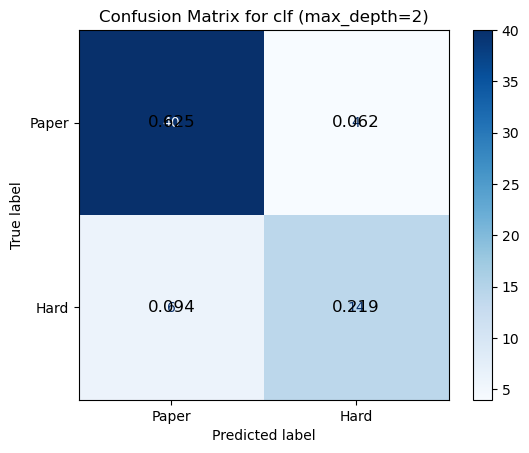

<Figure size 800x600 with 0 Axes>

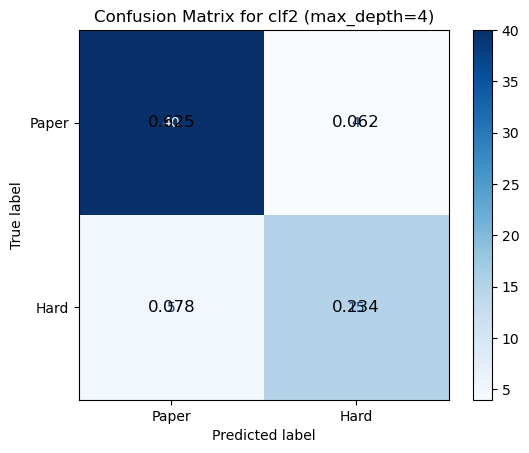

Confusion Matrix for clf (max_depth=2):
 [[40  4]
 [ 6 14]]

Confusion Matrix for clf2 (max_depth=4):
 [[40  4]
 [ 5 15]]


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predictions for clf (model trained with 'List Price' feature)
y_pred_clf = clf.predict(X_test)

# Predictions for clf2 (model trained with 'NumPages', 'Thick', and 'List Price' features)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Generate confusion matrix for clf (with max_depth=2)
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paper', 'Hard'])

# Set title using plt.title() and display the matrix with rounded values
plt.figure(figsize=(8, 6))
disp_clf.plot(cmap='Blues')

# Annotate the plot with rounded values
for i in range(cm_clf.shape[0]):
    for j in range(cm_clf.shape[1]):
        plt.text(j, i, f"{np.round(cm_clf[i, j] / np.sum(cm_clf), 3):.3f}", 
                 ha="center", va="center", color="black", fontsize=12)

plt.title("Confusion Matrix for clf (max_depth=2)")
plt.show()

# Generate confusion matrix for clf2 (with max_depth=4)
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paper', 'Hard'])

# Set title using plt.title() and display the matrix with rounded values
plt.figure(figsize=(8, 6))
disp_clf2.plot(cmap='Blues')

# Annotate the plot with rounded values
for i in range(cm_clf2.shape[0]):
    for j in range(cm_clf2.shape[1]):
        plt.text(j, i, f"{np.round(cm_clf2[i, j] / np.sum(cm_clf2), 3):.3f}", 
                 ha="center", va="center", color="black", fontsize=12)

plt.title("Confusion Matrix for clf2 (max_depth=4)")
plt.show()

# Optionally, print the confusion matrices
print("Confusion Matrix for clf (max_depth=2):\n", cm_clf)
print("\nConfusion Matrix for clf2 (max_depth=4):\n", cm_clf2)


The performance of the two models, clf and clf2, is measured using sensitivity, specificity, and accuracy. Sensitivity shows how well the model identifies hardcover books (positive cases). A high sensitivity means the model correctly predicts most hardcover books. Specificity shows how well the model identifies paperback books (negative cases). A high specificity means the model avoids wrongly predicting paperback books as hardcovers. Accuracy shows the overall correctness of predictions, showing the proportion of correct guesses for both hardcover and paperback books.

Confusion matrices are used to understand how each model makes predictions. These matrices show the number of true positives (correctly identified hardcover books), true negatives (correctly identified paperback books), false positives (paperbacks wrongly predicted as hardcovers), and false negatives (hardcovers wrongly predicted as paperbacks). The first model, clf, only uses List Price as a feature, which gives limited information. This makes its predictions simpler and less accurate. The second model, clf2, uses three features which are NumPages, Thick, and List Price. This extra information helps the model make more detailed predictions, leading to higher sensitivity, specificity, and accuracy.

The results show that adding more features, as in clf2, improves the model’s ability to classify books correctly and reduces errors.

Q6 chat bot session: https://chatgpt.com/share/674007ca-6740-8009-a61b-8e936e996fdb

7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The differences between the two confusion matrices below are caused by the features used in the models. The first matrix from clf uses only List Price which limits its accuracy. The second matrix from clf2 uses NumPages, Thick, and List Price which results in better predictions and fewer errors. The matrices above are more reliable because they are based on the test set and it better show how the models perform on unseen data. The matrices below are based on the training set and may not reflect real-world results.

Q7 chat bot sesison: https://chatgpt.com/share/67400d87-62d8-8009-ab0e-a020ba89f336